<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.

In [1]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-06 14:16:15--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  22.5MB/s    in 1.5s    

2021-10-06 14:16:16 (22.5 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [2]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [3]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [9]:
#TODO = train_test_split(#TODO)
def train_test_split(X, y, ratio):
    n = X.shape[0]
    n_train = int(n * ratio)
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]
    return X_train, y_train, X_test, y_test

In [24]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 8/10)

TypeError: Singleton array array(0.8) cannot be considered a valid collection.

Then a validation set from the train set:

In [14]:
#TODO = train_test_split(#TODO)
X_train, y_train, X_val, y_val = train_test_split(X_train, y_train, 7/8)

In [25]:
# By sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8/10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=7/8, random_state=42)

In [26]:
X_train.shape

(3139, 1001)

In [27]:
X_val.shape

(449, 1001)

In [28]:
X_test.shape

(897, 1001)

Let's KFold over different values of `C`:

In [35]:
C_values = [0.01, 0.1, 1, 10, 50]
accuracies = []

for c in C_values:
    print(f'Training SVM with C={c}')
    #TODO
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C=c))
    # Fit on sub-train set
    # TODO
    clf.fit(X_train, y_train)

    # Evaluate on val set
    score = clf.score(X_val, y_val)
    
    # TODO
    accuracies.append(score)
    
    print(f'--> accuracy = {score}')

Training SVM with C=0.01
--> accuracy = 0.10244988864142539
Training SVM with C=0.1
--> accuracy = 0.48775055679287305
Training SVM with C=1
--> accuracy = 0.7817371937639198
Training SVM with C=10
--> accuracy = 0.7616926503340757
Training SVM with C=50
--> accuracy = 0.7616926503340757


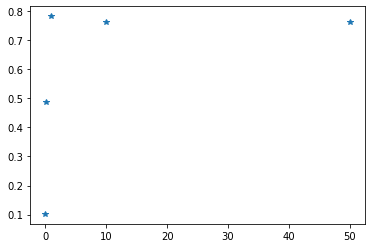

In [37]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies, '*')

In [47]:
#TODO Fit on the whole train set, evaluate on the test set
c_opt = C_values[np.array(accuracies).argmax()]
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C=c_opt))
X_train_total = np.concatenate((X_train, X_val), axis=0)
y_train_total = np.concatenate((y_train, y_val), axis=0)
clf.fit(X_train_total, y_train_total)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto'))])

In [48]:
test_score = clf.score(X_test, y_test)
print(f'--> accuracy = {test_score}')

--> accuracy = 0.7324414715719063


Do the same with different kernel values, and different decision functions:

In [38]:
# TODO
X_train.shape

(3139, 1001)